In [1]:
import tensorflow

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

C:\Users\RISHYENDRA KUMAR\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\cnn_multiclass\train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 888 images belonging to 7 classes.


In [6]:
test_set = test_datagen.flow_from_directory(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\cnn_multiclass\test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 225 images belonging to 7 classes.


In [7]:
history=classifier.fit(training_set,
                         steps_per_epoch = 80,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 80)

Epoch 1/20


C:\Users\RISHYENDRA KUMAR\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/80 ━━━━━━━━━━━━━━━━━━━━ 28s 545ms/step - accuracy: 0.6338 - loss: 1.4846

C:\Users\RISHYENDRA KUMAR\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 229ms/step - accuracy: 0.6874 - loss: 1.2910 - val_accuracy: 0.7600 - val_loss: 0.9164
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.7681 - loss: 0.7556 - val_accuracy: 0.8222 - val_loss: 0.6367
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.8181 - loss: 0.5338 - val_accuracy: 0.8356 - val_loss: 0.5029
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.8495 - loss: 0.4591 - val_accuracy: 0.8578 - val_loss: 0.4272
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.8846 - loss: 0.3495 - val_accuracy: 0.8578 - val_loss: 0.4143
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.8936 - loss: 0.2990 - val_accuracy: 0.8356 - val_loss: 0.4516
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.9296 - loss: 0.2433 - val_accuracy: 0.8667 - val_loss: 0.4444
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.9276 - loss: 0.2161 - val_accuracy: 0.866

In [8]:
# Evaluate the model
val_loss, val_accuracy = classifier.evaluate(test_set)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8664 - loss: 0.6585
Validation Loss: 0.6383256316184998
Validation Accuracy: 0.8711110949516296


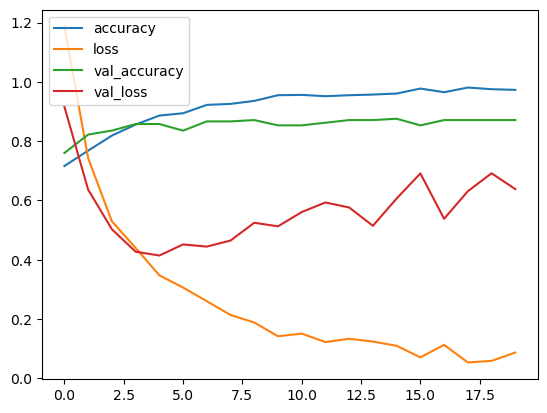

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

metrics_df=pd.DataFrame(history.history)
metrics_df.plot()
plt.show()

In [10]:

import numpy as np
from keras.preprocessing import image
test_image = \
    image.load_img(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\cnn_multiclass\test\dragonfly\image_0038.jpg'
                   , target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [11]:
print (result)

[[0. 0. 0. 1. 0. 0. 0.]]


In [12]:
import numpy as np
from keras.preprocessing import image
test_image = \
    image.load_img(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\cnn_multiclass\test\dragonfly\image_0015.jpg'
                   , target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [13]:
print (result)

[[0. 0. 0. 1. 0. 0. 0.]]


In [14]:
import numpy as np
from keras.preprocessing import image

# Load and preprocess the image
test_image = image.load_img(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\cnn_multiclass\test\dragonfly\image_0038.jpg',
                            target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class
result = classifier.predict(test_image)

# Get the class labels (assuming training_set is your training data generator)
class_labels = training_set.class_indices

# Invert the class_labels dictionary to map indices to class names
class_labels = {v: k for k, v in class_labels.items()}

# Get the predicted class index (the index of the highest probability)
predicted_class_index = np.argmax(result, axis=1)[0]

# Get the class name corresponding to the predicted index
predicted_class_name = class_labels[predicted_class_index]

print(f'Predicted class: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: dragonfly
